# Volume 3: Pandas 3 (Grouping)
    Patricia D. Bata
    BUDS Program
    August 13, 2019

In [1]:
import numpy as np
import pandas as pd
from pydataset import data
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

The data *time_usage.txt* contains data on how Americans spend their time from 2007-2017.
Read in the data as a DataFrame object and use groupby() to filter through the DataFrame and answer the following questions:

1. How did the mean amount of time spent on all activities change over 2007 to 2017?

2. On average (using the mean), did Americans spend more time doing exercise or watching TV  over the past ten years? What was the difference?

(Hint: The column *Estimate* gives the amount of hours spent on an activity. The activity *Watching TV* contains data on Americans watching TV and the activity *Participating in Sports Exercise and Rec Activity* contains data on Americans exercising.)

In [2]:
time_full = pd.read_csv("time_usage.txt").set_index("Activity")
time = time_full[time_full.index != "Total Hours"]
#Mean amount of time difference in 2017 and 2007
year = time.groupby("Year")
list(year.groups)
year.mean().loc[[2017,2007],"Estimate"].diff()

Year
2017         NaN
2007    0.003448
Name: Estimate, dtype: float64

In [3]:
#Exercise and Watching TV
act = time.groupby(["Activity"])
act.sum().loc[["Participating in Sports Exercise and Rec Activity","Watching TV"],"Estimate"].diff()

Activity
Participating in Sports Exercise and Rec Activity      NaN
Watching TV                                          27.02
Name: Estimate, dtype: float64

1. The mean change in the amount of time spent on all activities is **0.003448 hours**.
2. On average, Americans spent **more time watching TV** compared to doing exercise. The difference between the two averages over 10 years is **27.02 hours**.

## Problem 2

Use the time usage data to answer the following questions. Support your claims with readable, labeled visualizations.

1. In what activity did Americans spend most of their time in 2017?

2. In what year did Watching TV increase the most? What about Volunteering?

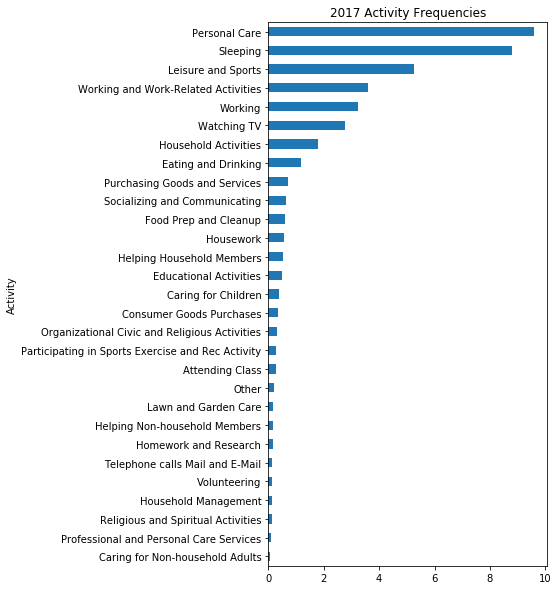

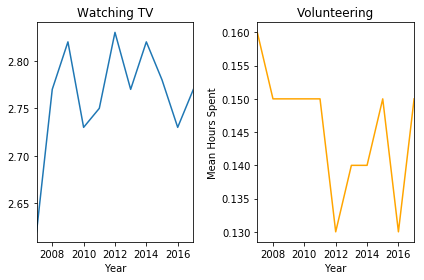

In [4]:
#Bar Graph of activities of Americans in 2017
year.get_group(2017).sort_values("Estimate").plot(kind="barh",y="Estimate", legend = False, title = "2017 Activity Frequencies",figsize = (5,10))
fig, axes = plt.subplots(1, 2)

#Year when Watching TV increased the most
act.get_group("Watching TV").set_index("Year").plot(kind="line", y="Estimate", legend = False, title = "Watching TV",ax=axes[0])
#Year when Volunteering increased the most
plt.ylabel("Mean Hours Spent")
act.get_group("Volunteering").set_index("Year").plot(kind="line", y="Estimate", legend = False, title = "Volunteering",ax=axes[1],color='orange')
plt.tight_layout()
plt.show()

1. Americans spent most of their time doing **"Personal Care"** in the year 2017.
2. Watching TV increased the most in the year **2008**, while volunteering increased the most in the year **2016**.

## Problem 3

The file *Ohio_1999.csv* contains data on workers in Ohio in the year 1999. Use pivot tables to answer the following questions:

1. What was the highest paid race/sex combination? What was the lowest paid?

2. What race/sex combination worked the least amount of hours? What from the data explains why?

3. What race/sex combination works the most hours per week per person?

Some useful keys for the information are:

1. In column *Sex*, {1: male, 2: female}

2. In column *Race*, {1: White, 2: African-American, 3: Native American/Eskimo, 4: Asian}

In [5]:
ohio1 = pd.read_csv("Ohio_1999.csv")
#Indices are Race and Sex (Columns: )
sexdict = {1:"Male", 2:"Female"}
racedict = {1:"White",2:"African-American",3:"Native American/Eskimo", 4:"Asian"}
ohio1.Sex.replace(sexdict, inplace=True)
ohio1.Race.replace(racedict, inplace = True)
ohio = ohio1.pivot_table(values=["Yearly Salary","Usual Hours Worked","Usual Weekly Earnings"], index= ["Race","Sex"])
#Arranged by yearly salary (DESC)
ohio.sort_values("Yearly Salary",ascending = False)

,,Usual Hours Worked,Usual Weekly Earnings,Yearly Salary
Race,Sex,,,
Asian,Male,38.666667,340.200000,54347.066667
Native American/Eskimo,Male,48.666667,0.000000,53000.000000
White,Male,43.254098,170.713115,47564.566745
Asian,Female,40.555556,283.666667,36477.777778
African-American,Male,40.372881,182.508475,32872.067797
White,Female,40.512153,149.074653,30867.947917
Native American/Eskimo,Female,40.000000,0.000000,29000.000000
African-American,Female,38.000000,88.294118,26615.897059


In [6]:
#Check where the groups stand amongst other groups
ohio1.groupby(["Race","Sex"]).mean()

Usual Weekly Earnings  Usual Hours Worked  \
Race                   Sex                                                 
African-American       Female              88.294118           38.000000   
                       Male               182.508475           40.372881   
Asian                  Female             283.666667           40.555556   
                       Male               340.200000           38.666667   
Native American/Eskimo Female               0.000000           40.000000   
                       Male                 0.000000           48.666667   
White                  Female             149.074653           40.512153   
                       Male               170.713115           43.254098   

                                     Age  Educational Attainment  \
Race                   Sex                                         
African-American       Female  41.544118               40.205882   
                       Male    42.322034               40.050847   
Asian                  Female  36.333333               42.333333   
                       Male    32.866667               41.666667   
Native American/Eskimo Female  44.000000               40.000000   
                       Male    50.333333               41.666667   
White                  Female  40.147569               40.671875   
                       Male    40.819672               40.728337   

                               Yearly Salary  
Race                   Sex                    
African-American       Female   26615.897059  
                       Male     32872.067797  
Asian                  Female   36477.777778  
                       Male     54347.066667  
Native American/Eskimo Female   29000.000000  
                       Male     53000.000000  
White                  Female   30867.947917  
                       Male     47564.566745

In [7]:
#Race/Sex combination hours of work per week per person (arranged DESC)
ohio.sort_values("Usual Hours Worked",ascending = False)

,,Usual Hours Worked,Usual Weekly Earnings,Yearly Salary
Race,Sex,,,
Native American/Eskimo,Male,48.666667,0.000000,53000.000000
White,Male,43.254098,170.713115,47564.566745
Asian,Female,40.555556,283.666667,36477.777778
White,Female,40.512153,149.074653,30867.947917
African-American,Male,40.372881,182.508475,32872.067797
Native American/Eskimo,Female,40.000000,0.000000,29000.000000
Asian,Male,38.666667,340.200000,54347.066667
African-American,Female,38.000000,88.294118,26615.897059


1. The highest paid race/sex combination is **Asian and Male** while lowest paid combination is **African-American and Female**.
2. The race/sex combination that worked the least amount of horus is **African-American and Female**. From the data, this can be supported with the fact that this race/sex group also has the **lowest yearly salary**.
3. The race/sex combination that worked the most amount of hours is **Native American/Eskimo and Male**.

## Problem 4

Use the employment data from Ohio in 1999 to answer the following questions:

1. The column *Educational Attainment* contains numbers 0-46. Any number less than 39 means the person did not get any form of degree. 39-42 refers to either a high-school or associate's degree. A number greater than 43 means the person got at least a bachelor's degree. What is the most common degree among workers?

2. Partition the *Age* column into 4 equally populated intervals. Which interval contains the most workers with no degree? A degree that is less than a bachelor's degree? A bachelor's degree or higher?

3. What age/degree combination has the greatest yearly salary on average?

In [8]:
#Degree and Age bins as Interval type (without the specification pd.arrays.IntervalArray, code breaks)
ohio1["educ"] = pd.arrays.IntervalArray(pd.cut(ohio1['Educational Attainment'], [0,38,42,46]))
ohio1["agebins"] = pd.arrays.IntervalArray(pd.qcut(ohio1['Age'], 4))

#educ intervals as index and count of rows for each degree
ohio1.pivot_table(index = "educ", values = "Educational Attainment" , aggfunc = "count").sort_values("Educational Attainment", ascending = False)

,Educational Attainment
educ,
"(38, 42]",967
"(42, 46]",530
"(0, 38]",88


In [9]:
#Count of age/degree combinaions sorted descending
ohio1.pivot_table(index = ["educ","agebins"], values = "Educational Attainment" , aggfunc = "count").sort_values("Educational Attainment", ascending = False)

Educational Attainment
educ     agebins                               
(38, 42] (15.999, 32.0]                     276
         (40.0, 49.0]                       250
         (32.0, 40.0]                       222
         (49.0, 85.0]                       219
(42, 46] (32.0, 40.0]                       141
         (40.0, 49.0]                       139
         (15.999, 32.0]                     130
         (49.0, 85.0]                       120
(0, 38]  (49.0, 85.0]                        26
         (15.999, 32.0]                      24
         (40.0, 49.0]                        21
         (32.0, 40.0]                        17

In [10]:
#Mean of age/degree combinations on Yearly Salary
ohio1.pivot_table(index = ["educ","agebins"], values = "Yearly Salary" , aggfunc = "mean").sort_values("Yearly Salary", ascending = False)

Yearly Salary
educ     agebins                      
(42, 46] (49.0, 85.0]     75260.100000
         (40.0, 49.0]     61728.827338
         (32.0, 40.0]     59218.014184
         (15.999, 32.0]   39720.338462
(0, 38]  (49.0, 85.0]     36636.961538
(38, 42] (40.0, 49.0]     35329.192000
         (49.0, 85.0]     32819.616438
         (32.0, 40.0]     32375.959459
         (15.999, 32.0]   25411.844203
(0, 38]  (32.0, 40.0]     21514.058824
         (40.0, 49.0]     18622.857143
         (15.999, 32.0]   17737.833333

1. The most common degrees among workers is either a **high-school or associate's degree**.
2. The age interval that contains the most workers for each level are:
    * **No degree**: (49, 85)
    * **Lower than Bachelor's Degree**: (16, 32)
    * **Bachelor's Degree and Higher**: (32, 40)
3. On average, the age/degree combination with the highest yearly salary is the **(49,85] year olds with a Bachelor's Degree or higher**.

## Problem 5

The *pydataset* contains a data set *iris*, which contains the measurements of various flower species.
Use this data to answer the following questions:

1. Which flower species is the easiest distinguish and why?

2. What is the correlation between petal and sepal size for each species?

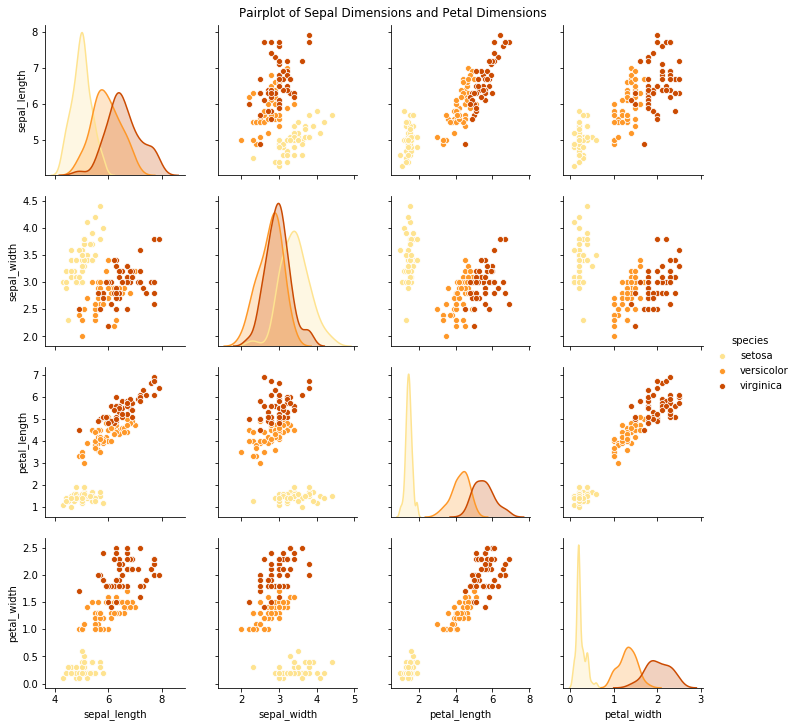

In [11]:
flower = data("iris")
flower["Petal.Size"] = flower["Petal.Length"]*flower["Petal.Width"]
flower["Sepal.Size"] = flower["Sepal.Length"]*flower["Sepal.Width"]

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette = "YlOrBr").fig.suptitle("Pairplot of Sepal Dimensions and Petal Dimensions",y=1.005)
plt.show()

The most distinguishable species is setosa. This can be seen in the pairplot below, graphing the petal and sepal dimensions of each iris species. From the graphs, we see that there is almost always an overlap between the versicolor and virginica species of iris while the setosa species never overlaps with the other species in the scatter plots.

In addition, in the plots that show the frequency of petal_width and petal_length, we see that the setosa species have a lower mean value and its distributions do not overlap with the other two species. So we can say that the setosa species is the most distinguishable species due to its small petal size.

Petal.Size  Sepal.Size
Species                                      
setosa     Petal.Size    1.000000    0.282434
           Sepal.Size    0.282434    1.000000
versicolor Petal.Size    1.000000    0.731901
           Sepal.Size    0.731901    1.000000
virginica  Petal.Size    1.000000    0.696012
           Sepal.Size    0.696012    1.000000

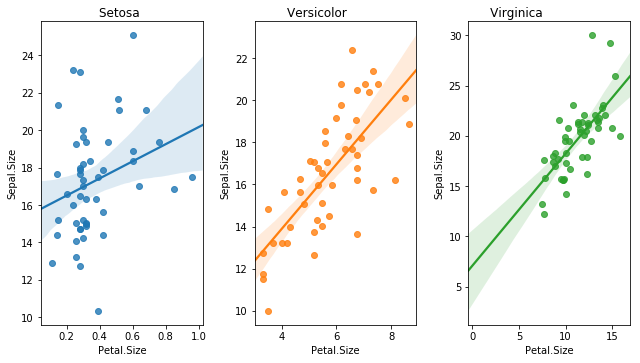

In [12]:
#Correlation for petal and sepal size for each species
a4_dims = (9, 5)
fig, axes = plt.subplots(1,3,figsize=a4_dims)

sns.regplot(x="Petal.Size", y="Sepal.Size", data=flower[flower["Species"] == "setosa"],ax=axes[0])
sns.regplot(x="Petal.Size", y="Sepal.Size", data=flower[flower["Species"] == "versicolor"],ax=axes[1])
sns.regplot(x="Petal.Size", y="Sepal.Size", data=flower[flower["Species"] == "virginica"],ax=axes[2])
plt.suptitle("Setosa                                      Versicolor                                     Virginica", y=1)
plt.tight_layout()

flower.groupby("Species")["Petal.Size","Sepal.Size"].corr()

From the graphs we can see that the species with the biggest correlation of its petal size and sepal size is versicolor with a correlation of 0.73. The setosa species seems to have a varied sepal size while the virginica seems to have clumped to values of a petal size.